<a href="https://colab.research.google.com/github/juDEcorous/Sales_Predictions/blob/main/Project_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **SALES PREDICTION** </center>

Jude Maico Jr.

## Data Dictionary

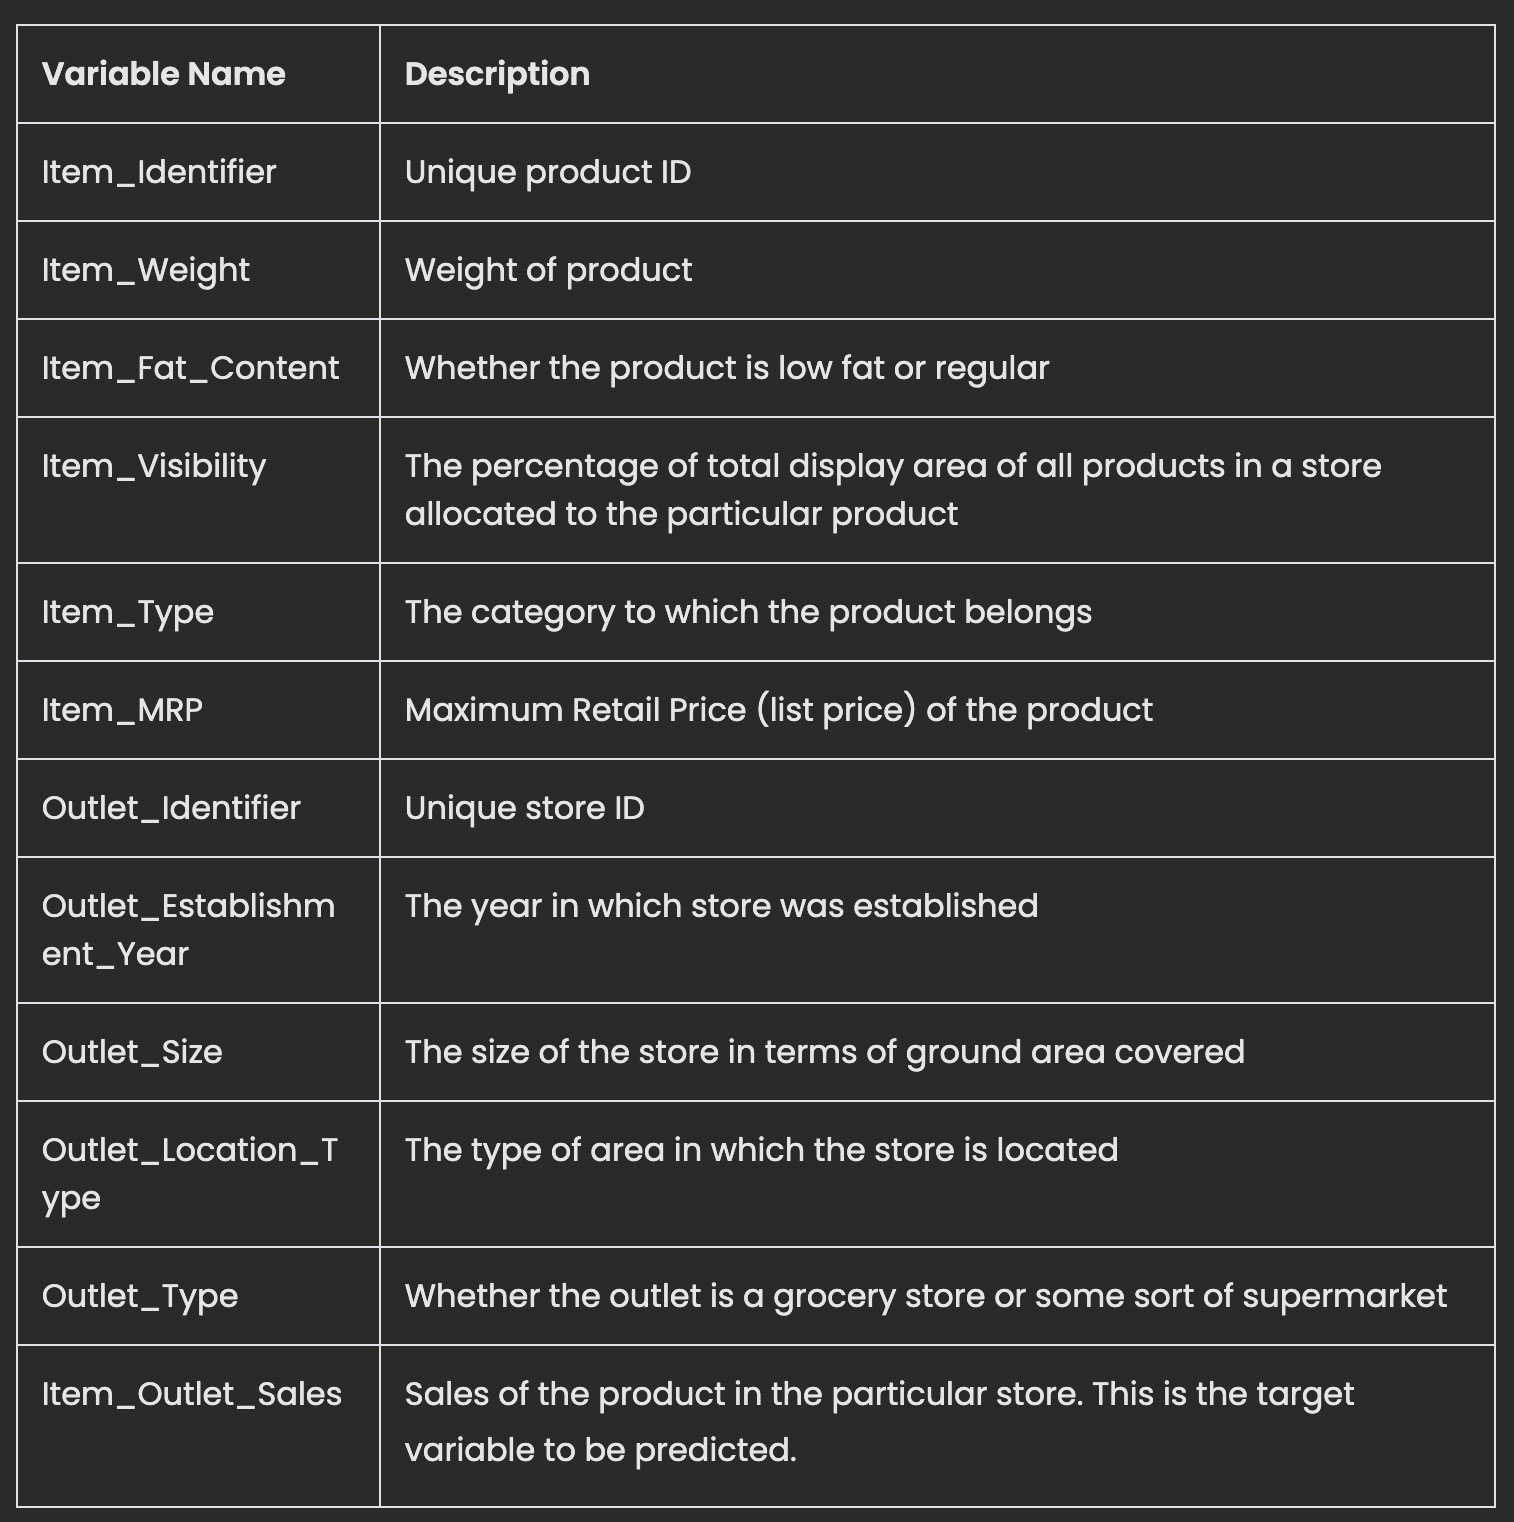

## Imports

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Loading Data

In [2]:
df = pd.read_csv('Data/sales_predictions.csv')
df2 = df.copy()

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

### Rows and Columns

In [4]:
df.shape

(8523, 12)

In [5]:
print(f'There is {df.shape[0]} rows, and {df.shape[1]} coulums.')

There is 8523 rows, and 12 coulums.


### Datatypes of each variable

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Duplicates

In [8]:
df.duplicated().sum()

0

In [9]:
print(f'There is {df.duplicated().sum()} duplicate/s in our data.')

There is 0 duplicate/s in our data.


### Missing Values.

In [10]:
NAs = df.isna().sum()
NAs

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df.isna().sum().sum()

3873

In [12]:
#checking percentage of NaN
NaNpercent = ((NAs / df.shape[0])*100).round(2)
NaNpercent

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

<AxesSubplot: >

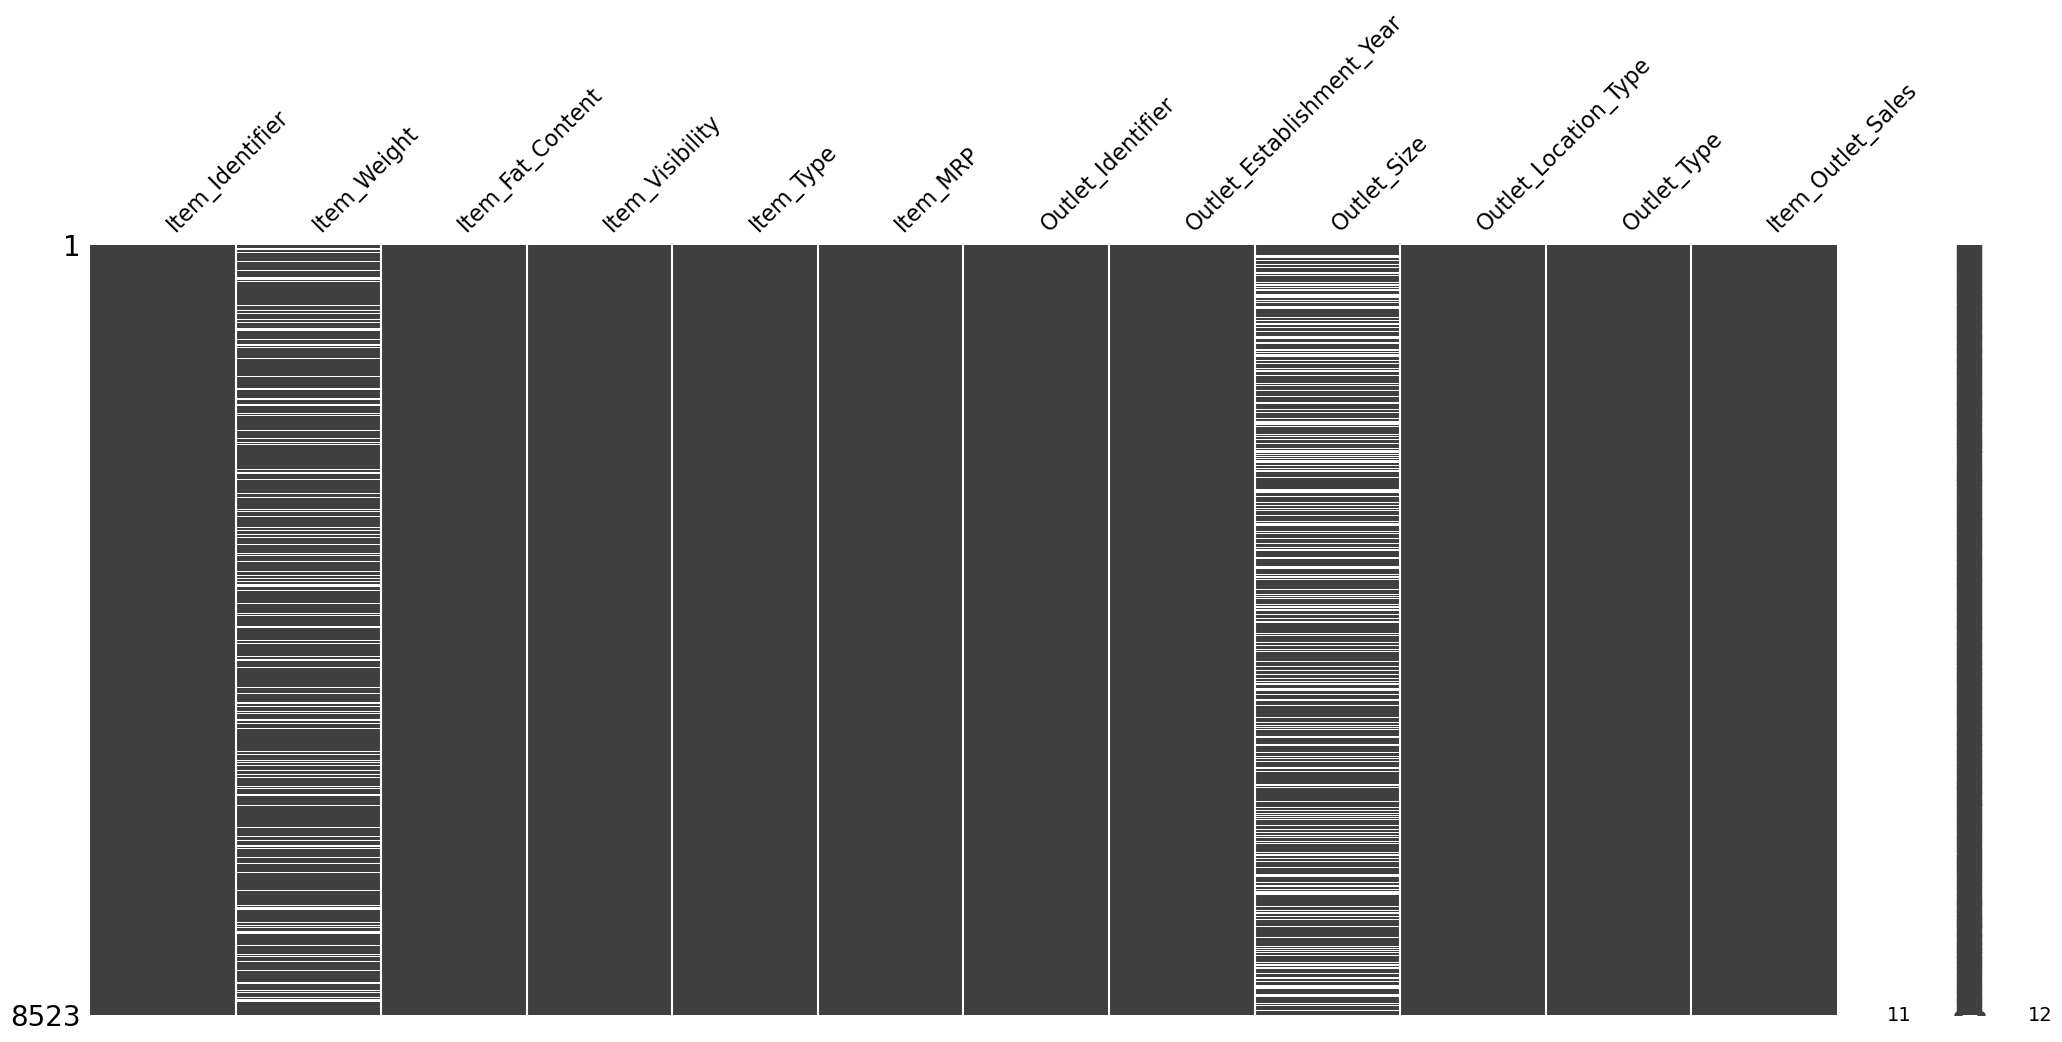

In [13]:
msno.matrix(df)

This graph shows us that the Null values of your data are scattered very randomly.

In [14]:
print(f'We will be dropping a total of {((df.isna().sum().sum())/len(df)*100).round(2)}% of rows if we drop all the NaNs ')

We will be dropping a total of 45.44% of rows if we drop all the NaNs 


We will investigate our Null values Further using the Outlet_Identifier Column.

In [15]:
#Filter Identifier

filter27 = df['Outlet_Identifier'] == 'OUT027'
filter13 = df['Outlet_Identifier'] == 'OUT013'
filter49 = df['Outlet_Identifier'] == 'OUT049'
filter46 = df['Outlet_Identifier'] == 'OUT046'
filter35 = df['Outlet_Identifier'] == 'OUT035'
filter45 = df['Outlet_Identifier'] == 'OUT045'
filter18 = df['Outlet_Identifier'] == 'OUT018'
filter17 = df['Outlet_Identifier'] == 'OUT017'
filter10 = df['Outlet_Identifier'] == 'OUT010'
filter19 = df['Outlet_Identifier'] == 'OUT019'

df[filter10].head(17)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
90,FDW20,20.750,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
122,FDB14,20.250,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
133,FDS52,8.890,Low Fat,0.009163,Frozen Foods,101.7016,OUT010,1998,NaN,Tier 3,Grocery Store,101.2016
139,NCN07,18.500,Low Fat,0.056816,Others,132.1284,OUT010,1998,NaN,Tier 3,Grocery Store,263.6568
174,FDI32,17.700,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,NaN,Tier 3,Grocery Store,345.5502


This filter shows us that "OUT019" and "OUT027" on Outlet_Identifier doesn't have weight on them. Another thing is that "OUT010", "OUT045" and "OUT017" on Outlet_Identifier doesn't have values on Outlet_Size. 

In [16]:
df.describe(include= "number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Addressing Missing Values

In [17]:
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

####  Missing Values on Item_Weight:
  - Dropping Missing values on Item_Weight would mean losing 17.17% of my rows. 
  - Only "OUT019" and "OUT027" on Outlet_Identifier doesn't have weight on them

 Dropping 17.17% rows is a great loss on the data, as well as I cannot afford to lose 2 types of Outlet_Identifier. I decided to put the median value of those Null rows in the Item_Weight because this is less affected by outliers than strategy = 'mean'.

In [18]:
df['Outlet_Size'].fillna('Unknown',inplace = True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Missing Values on Outlet_Size
  - 28.28% of rows are Missing.
  - "OUT010", "OUT045" and "OUT017" on Outlet_Identifier doesn't have values on Outlet_Size.

we cannot afford to lose 28.28% of our data, as well as, 3 types of out Outlet_Identifier. So to save the data, I decided to put 'Unknown' on the Null values under Outlet_Size as there is no way for us to determine the size of the outlet with the current data that we have. 

### Confirm that there are no missing values after addressing them

In [19]:
print(f'The total number of missing values in our data is {df.isna().sum().sum()}.')

The total number of missing values in our data is 0.


### Inconsistensies

#### Columns

In [20]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### Object Columns

In [21]:
data_types = df.dtypes
object_data_types = data_types[(data_types == "object")]
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [22]:
for column in object_data_types.index:
    print(column)
    print(df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [23]:
object_data_types.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

###### Fixing inconsistencies

In [24]:
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular' }, inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###### Item_Identifier Column

In [25]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

###### Item_Type Column

In [26]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

###### Item_Fat_Content Column

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###### Outlet_Identifier Column

In [28]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

###### Outlet_Size Column

In [29]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

###### Outlet_Location_Type Column

In [30]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

###### Outlet_Type Column

In [31]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

#### Numerical Column


In [32]:
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

In [33]:
categorical_columns = list(df.select_dtypes(include='object'))
categorical_columns.remove('Item_Identifier')
numerical_columns = list(df.select_dtypes(include='number'))

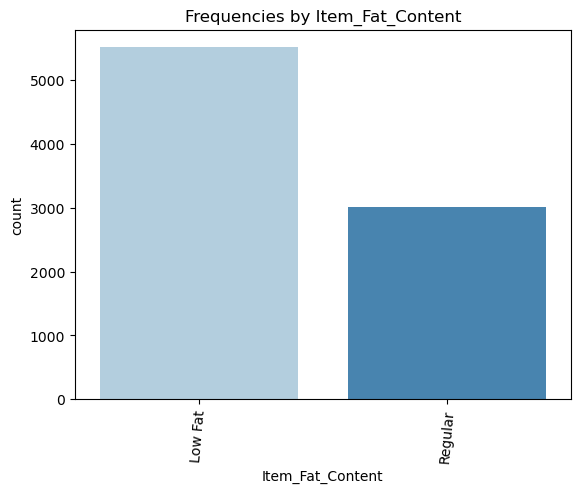

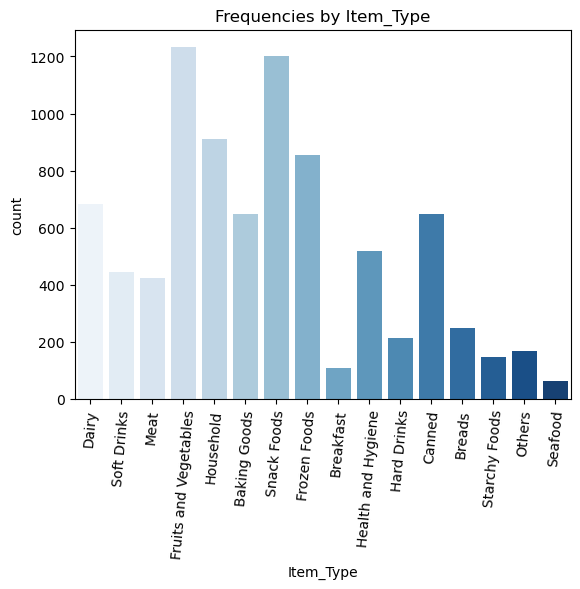

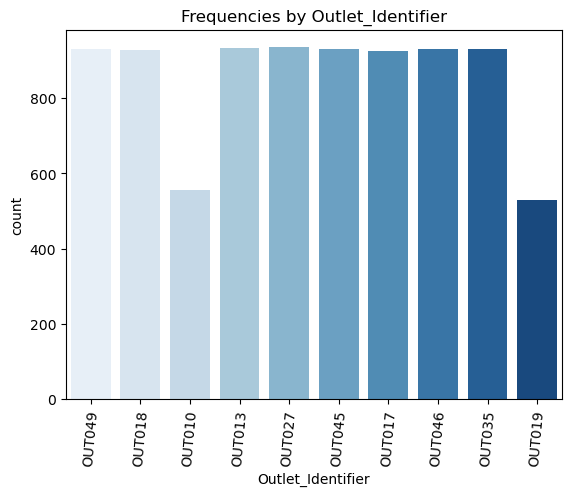

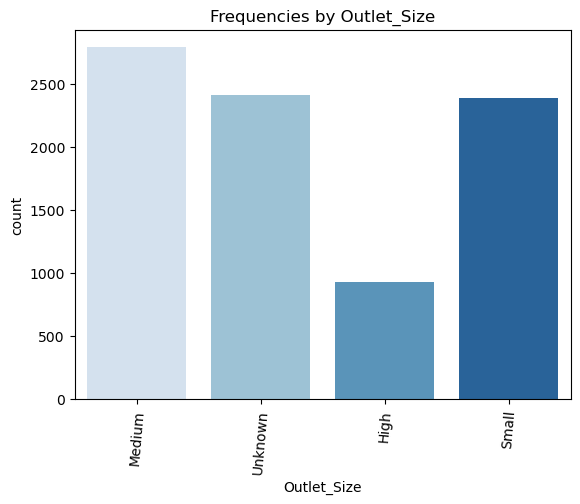

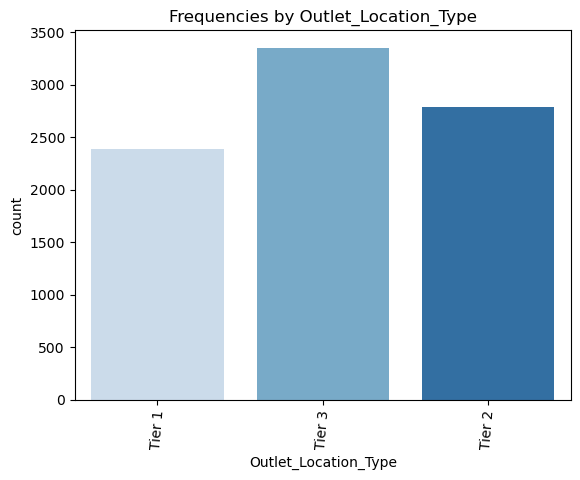

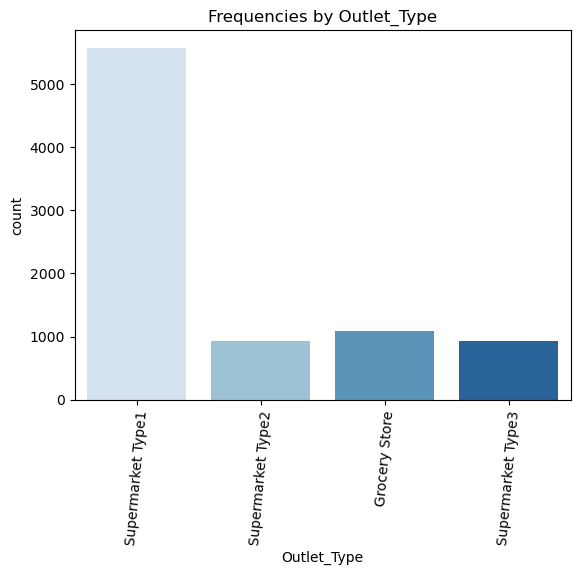

In [34]:
for column in categorical_columns:

  column_name = column
  
  plot = sns.countplot(data = df, x = column, palette='Blues')
  plt.xticks(rotation= 85)
  plot.set_title('Frequencies by ' + column_name)
  
  plt.show()

  # print blank lines for readability
  print('\n\n')

This graph shows the frequencies by column names in our categorical columns.

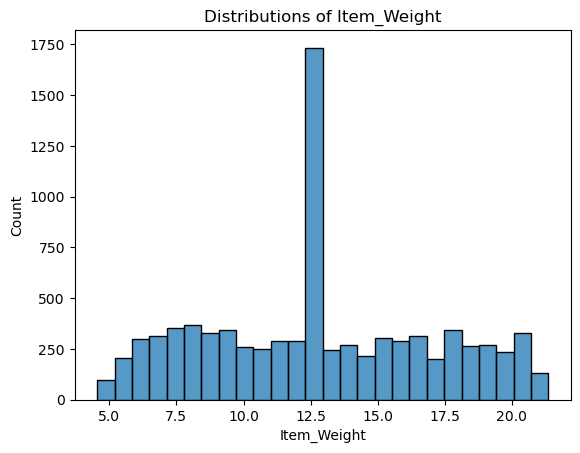

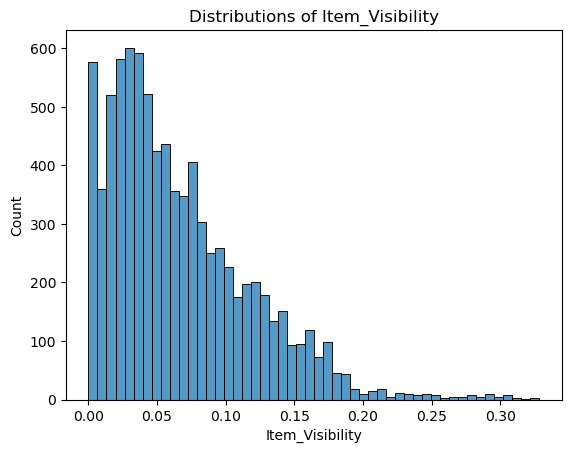

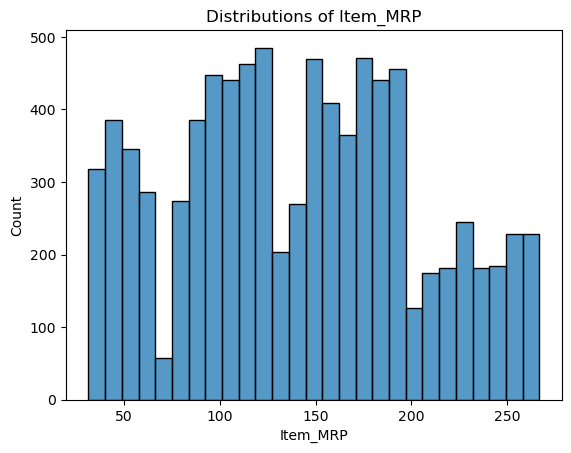

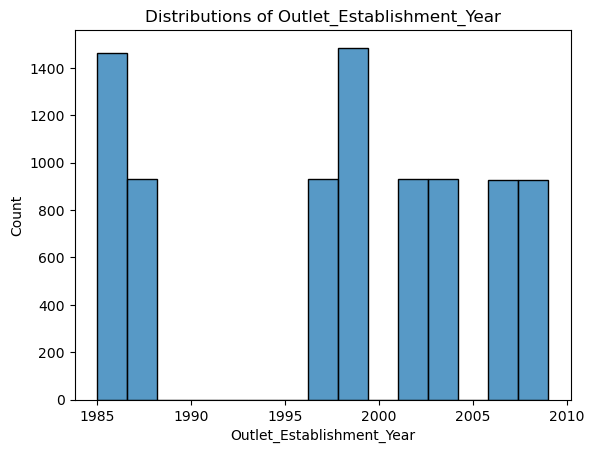

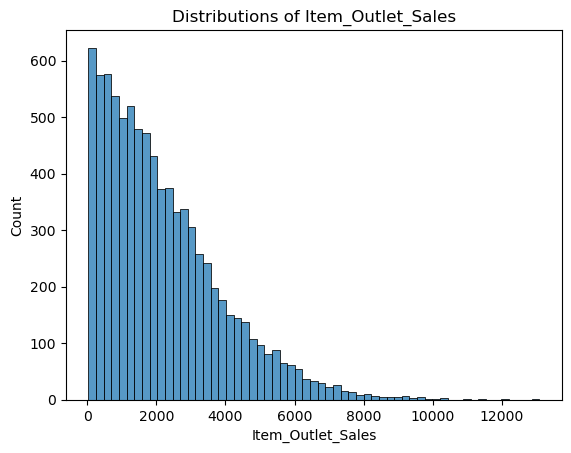

In [35]:
for column in numerical_columns:

  column_name = column
  
  plot = sns.histplot(data = df, x = column, bins = 'auto')
  plot.set_title('Distributions of ' + column_name)
  
  plt.show()

Focusing on Item_Outlet_Sales we can see that we have a sked to the right histogram.

<AxesSubplot: >

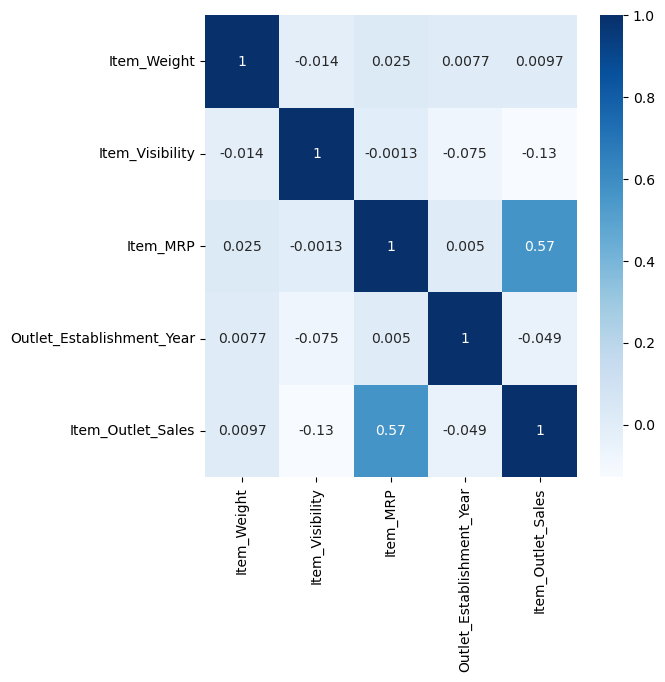

In [36]:
fig, ax = plt.subplots(figsize = (6,6 ))
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

This graph suggest that all of our columns do not have a strong correlation with each other. Moderate correlation can be seen with the Item_Outlet_Sales and Item_MRP.

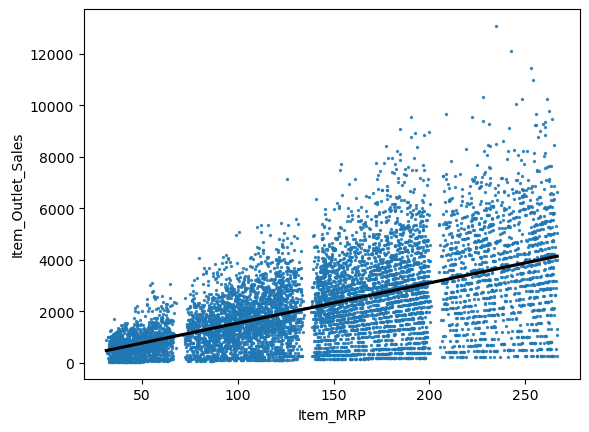

In [37]:
sns.regplot(data = df, 
            x = 'Item_MRP', 
            y = 'Item_Outlet_Sales', 
            line_kws = {'color':'black', 'ls': '-'},
            scatter_kws = {'s': 2});

Our scatterplot seems to show a positive direction. 

## Explanatory Visuals

Possible Questions to Answer:
1. What is the Average sales of outlet store?
1. Which Outlet Size has the most sales?
2. Which location type makes higher sales?
3. Which Item type sales most?


### **1.What is the Average sales of outlet store?**

In [38]:
outlet_mean = df['Item_Outlet_Sales'].mean().round(2)
outlet_mean

2181.29

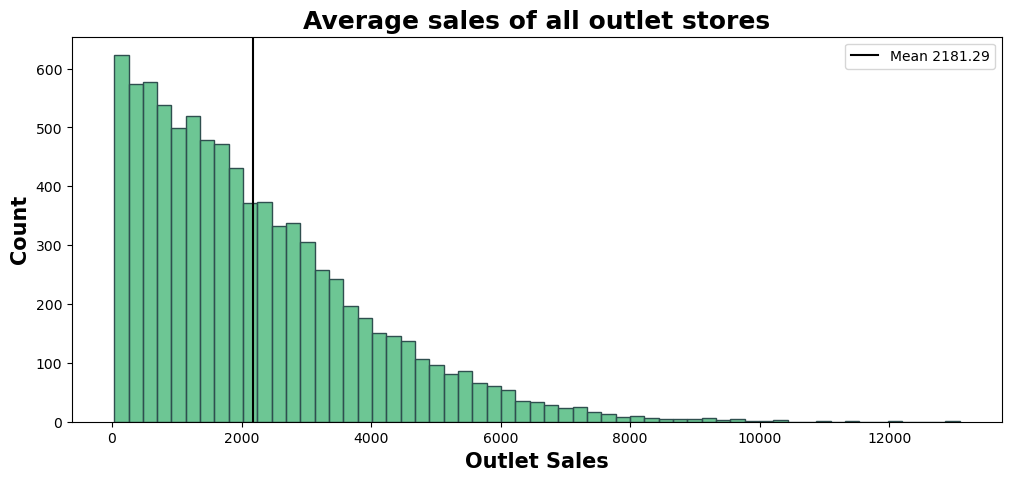

In [39]:
fig,ax = plt.subplots(figsize=(12,5))

sns.histplot(data=df, x = 'Item_Outlet_Sales', ax = ax, color='mediumseagreen', edgecolor='darkslategrey')

ax.set_title('Average sales of all outlet stores', fontsize = 18, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 15, fontweight = 'bold');


ax.axvline(outlet_mean, color='k', label=f'Mean {outlet_mean}');

ax.legend();
plt.savefig('Graph/average sales of all outlet stores.jpg', bbox_inches = 'tight')

- The average sales of outlets in our data is 2181.29.

### **2. Which Outlet Size has the most sales?**

In [40]:
sales_mean = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
sales_mean

Outlet_Size
Medium     2681.603542
High       2298.995256
Small      1912.149161
Unknown    1822.626947
Name: Item_Outlet_Sales, dtype: float64

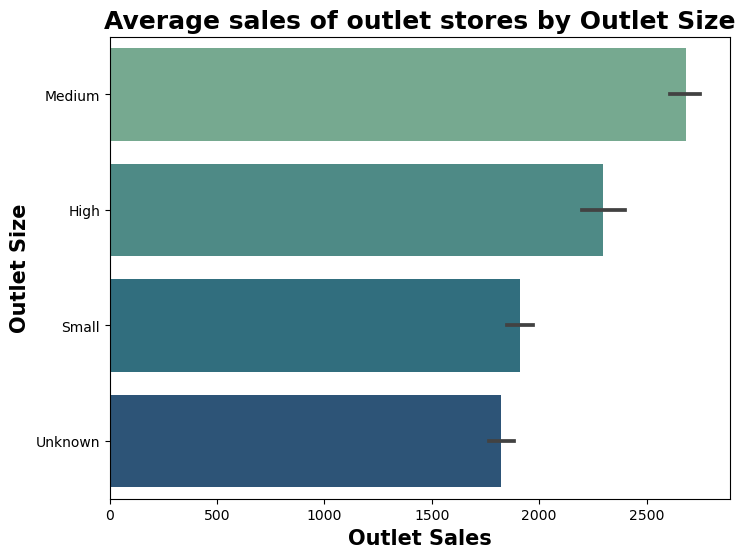

In [41]:
fig, ax = plt.subplots( figsize = (8, 6))

sns.barplot(data = df, y= 'Outlet_Size', x="Item_Outlet_Sales", ax=ax, order = sales_mean.index, palette='crest');


ax.set_title('Average sales of outlet stores by Outlet Size', fontsize = 18, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Size', fontsize = 15, fontweight = 'bold');
plt.savefig('Graph/average sales of outlet stores b y outlet size.jpg', bbox_inches = 'tight')

* **Top** earning Outlet Size
  - **Medium Size Outlet: 2681.60**
* 2nd earning Outlet Size
  - **High Size Outlet: 2298.99**
* 3rd earning outlet Size
  - **Small Size Outlet: 1912.14**
* Lowest earning Outlet Size
  - **Unknown Size Outlet: 1822.62**



### **3. Which location type makes higher sales?**

In [42]:
location_mean = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
location_mean

Outlet_Location_Type
Tier 2    2323.990559
Tier 3    2279.627651
Tier 1    1876.909159
Name: Item_Outlet_Sales, dtype: float64

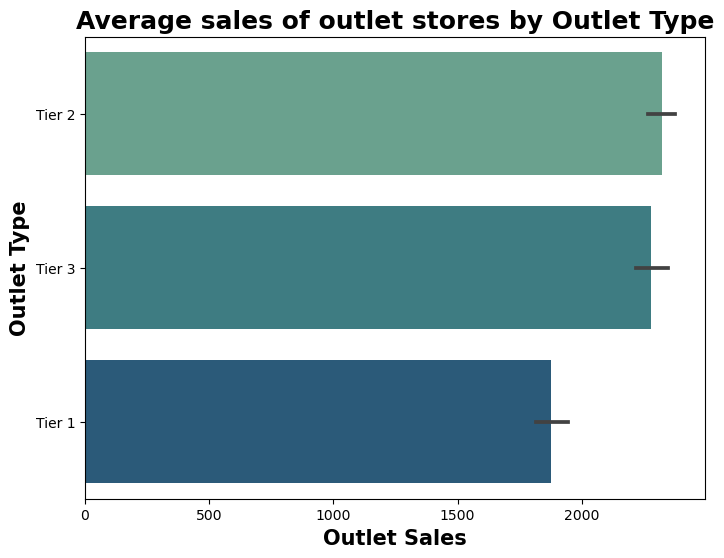

In [43]:
fig, ax = plt.subplots( figsize = (8, 6))

sns.barplot(data = df, x = 'Item_Outlet_Sales', y = "Outlet_Location_Type", ax = ax, order = location_mean.index, palette = 'crest');

ax.set_title('Average sales of outlet stores by Outlet Type', fontsize = 18, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Type', fontsize = 15, fontweight = 'bold');
plt.savefig('Graph/average sales of outlet stores by outlet type.jpg', bbox_inches = 'tight')

- **Top** earning per location type
  - **Tier 2: 2323.99**
- 2nd place earning per location type
  - **Tier 3: 2279.62**
- Lowest earning per location type
  - **Tier 1: 1876.90**

### **4. Which Items sales most?**

In [44]:
Item_mean = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
Item_mean

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

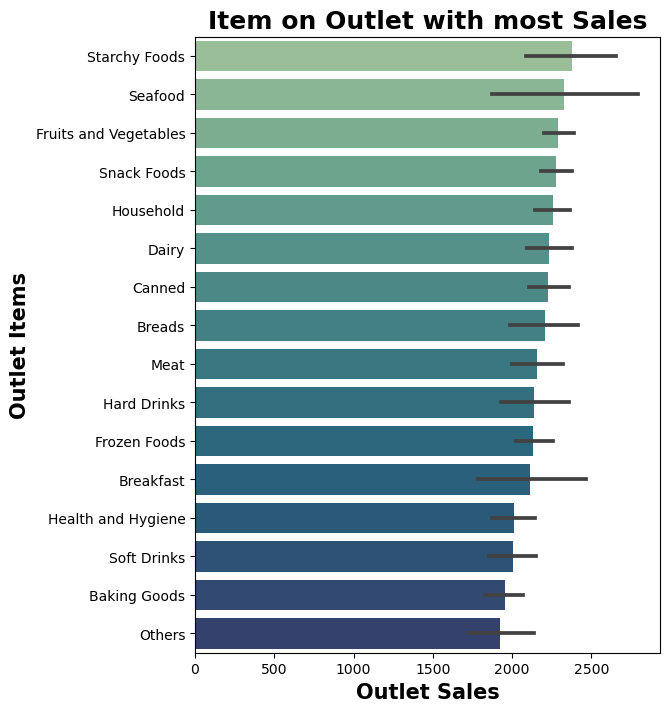

In [45]:
fig, ax = plt.subplots( figsize = (6, 8))

sns.barplot(data = df, y = 'Item_Type', x = "Item_Outlet_Sales", ax = ax, order = Item_mean.index, palette = 'crest');

ax.set_title('Item on Outlet with most Sales', fontsize = 18, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Items', fontsize = 15, fontweight = 'bold');
plt.savefig('Graph/item on outlet with most sales.jpg', bbox_inches = 'tight')

- Top 3 Item that sales most are:
  1. Starchy Foods: **2374.33**
  2. Seafood: **2326.06**
  3. Fruits and Vegetables: **2289.00**

### Additional graph base on answers in #2 and #3

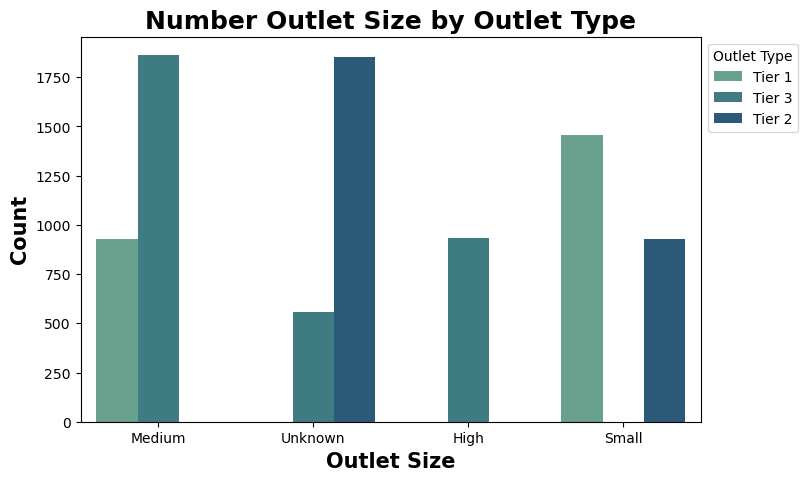

In [46]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.countplot(data = df, hue = 'Outlet_Location_Type', x = 'Outlet_Size', palette = 'crest')

ax.set_title('Number Outlet Size by Outlet Type', fontsize = 18, fontweight = 'bold');
ax.set_xlabel('Outlet Size', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Count', fontsize = 15, fontweight = 'bold');

plt.legend(bbox_to_anchor = (1,1), loc = 'upper left', title = 'Outlet Type')
plt.savefig('Graph/number of outlet size by outlet type.jpg', bbox_inches = 'tight')

- Though the top earning size is the Medium Size and the top earning location is tier 2. We cannot see any Tier 2 on our Medium size outlet. We need to investigate our Unknown values in this regard.

In [ ]:
# saving data 
df.to_csv('Data/cleaned')

# Processing Machine Learning

## Imports

In [47]:
#Modeling & preprocessing imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

## Reloading Data

In [48]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Preprocessing Steps

### Duplicates

In [49]:
print(f'we have a total number/s of {df2.duplicated().sum()} duplicates.')

we have a total number/s of 0 duplicates.


### Missing Values on the Target

In [50]:
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

It shows that we dont have a missing values in our Target which is Item_Outlet_Sales.

### Inconsistencies

In [51]:
#Fixing inconsistencies in column Item_Fat_Content
df2.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [52]:
fat_content_map = {'LF':'Low Fat',
                   'low fat':'Low Fat',
                   'reg':'Regular'}
            
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace(fat_content_map)
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##Identify the features (X) and target (y)

In [53]:
df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
y = df2['Item_Outlet_Sales']
X = df2.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier'])

We are dropping column

- Item_Identifier - this is unique to every products
 </br>

In [55]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


## Train Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Creating Preprocessing Pipeline

- Numerical - Item_ weight, Item_Visibility, Item_MRP, Outlet_Established_Year
- Nominal - Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Location
- Ordinal - Outlet_Size, Outlet_Type

### Numerical Features

In [57]:
#Column Selector
number_selector = make_column_selector(dtype_include = 'number')

#Transformers
#Standard Scaler
scaler = StandardScaler()
#Imputers
median_imputer = SimpleImputer(strategy = 'median')

#Pipeline
number_pipeline = make_pipeline(median_imputer, scaler)

#tuples
number_tuples = (number_pipeline, number_selector)

### Nominal Features

In [58]:
nominal_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type']

ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
missing_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')

nominal_pipeline = make_pipeline(missing_imputer, ohe)

nominal_tuples = (nominal_pipeline, nominal_columns)

### Ordinal Features

In [59]:
#Categorical list
Outlet_Size_list = ['Small', 'Medium', 'High']
Outlet_Type_list = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

ordinal_columns = ['Outlet_Size', 'Outlet_Type']

ordinal_encoder = OrdinalEncoder(categories = [Outlet_Size_list, Outlet_Type_list])
freq_imputer = SimpleImputer(strategy = 'most_frequent')
scaler2 = StandardScaler()

ordinal_pipeline = make_pipeline(freq_imputer, ordinal_encoder, scaler2)

ordinal_tuples = (ordinal_pipeline, ordinal_columns)

In [60]:
#Instantiate the make column transformer
preprocessor = make_column_transformer(number_tuples,
                                       nominal_tuples,
                                       ordinal_tuples,
                                       remainder='drop',
                                       verbose_feature_names_out=False)

In [61]:
#Fit X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000152F0839610>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehote...
                                  'Outlet_Location_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Grocery '
                                                                              'Store',
                                                                              'Supermarket '
                                                                              'Type1',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Type'])],
                  verbose_feature_names_out=False)

In [62]:
#Transform X_train and X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [63]:
#Converting X_train and X_test to DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns = preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_processed, columns = preprocessor.get_feature_names_out())

In [64]:
display(X_train_df.head())
print(f'\nShape of the data is: {X_train_df.shape}')
print(f'\nThere are {X_train_df.isna().sum().sum()} missing values')
print(f'\nThe data types are: \n{X_train_df.dtypes}')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size,Outlet_Type
0,0.827485,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.287374,0.983572
1,0.566644,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.287374,0.983572
2,-0.121028,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.287374,-0.263600
3,-1.158464,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.384048,-0.263600
4,1.538870,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.287374,-0.263600



Shape of the data is: (6392, 37)

There are 0 missing values

The data types are: 
Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_Sta

## Model Prediction

Imports

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [66]:
#checking that preprocessor is working
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000152F0839610>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehote...
                                  'Outlet_Location_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Grocery '
                                                                              'Store',
                                                                              'Supermarket '
                                                                              'Type1',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Type'])],
                  verbose_feature_names_out=False)

In [67]:
metrics_df = pd.DataFrame()
#For model evaluation
def performance_metrics(y_true, y_pred, name = 'name'):
    
    metrics_df.at[(f'{name}'), 'r2'] = r2_score(y_true, y_pred)
    metrics_df.at[(f'{name}'), 'MAE'] = mean_absolute_error(y_true, y_pred)
    metrics_df.at[(f'{name}'), 'MSE'] = mean_squared_error(y_true, y_pred)  
    metrics_df.at[(f'{name}'), 'RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))

### Linear Regression Model

In [68]:
linear_reg = LinearRegression()
linear_reg_pipe = make_pipeline(preprocessor, linear_reg)
linear_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000152F0839610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='mis...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [69]:
linear_reg_train_pred = linear_reg_pipe.predict(X_train)
linear_reg_test_pred = linear_reg_pipe.predict(X_test)

performance_metrics(y_train, linear_reg_train_pred, name = 'Linear Regression Train')
performance_metrics(y_test, linear_reg_test_pred, name = 'Linear Regression Test')

In [70]:
display(metrics_df.round(2))

,r2,MAE,MSE,RMSE
Linear Regression Train,0.56,847.22,1297594.56,1139.12
Linear Regression Test,0.57,804.15,1194051.48,1092.73


- This model have  a low r2 but MAE and RMSE doesn't look too bad. We need to investigate other models.

### Decision Tree Regressor Model

In [71]:
decision_tree = DecisionTreeRegressor(random_state = 42)
decision_tree_pipe = make_pipeline(preprocessor, decision_tree)
decision_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000152F0839610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='mis...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [72]:
decision_tree_train_pred = decision_tree_pipe.predict(X_train)
decision_tree_test_pred = decision_tree_pipe.predict(X_test)

performance_metrics(y_train, decision_tree_train_pred, name = 'Decision Tree Train')
performance_metrics(y_test, decision_tree_test_pred, name = 'Decision Tree Test')

In [73]:
display(metrics_df.tail(2).round(2))

,r2,MAE,MSE,RMSE
Decision Tree Train,1.00,0.00,0.00,0.00
Decision Tree Test,0.19,1038.16,2221988.71,1490.63


- In this model our data is **Overfitting**, performing too well in Training Data but too poorly at Testing Data. We can also see that the Testing RMSE is higher than the Training. This model did not perform well with our data.

### Tuned Decision Tree Regressor Model

In [74]:
decision_tree.get_depth()

40

In [75]:
depths = range(2, 41)
scores = pd.DataFrame(index = depths, columns = ['Train Score', 'Test Score'])

for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
  dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
  dec_tree_pipe.fit(X_train, y_train)
  dec_train_score = dec_tree_pipe.score(X_train, y_train)
  dec_test_score = dec_tree_pipe.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = dec_train_score
  scores.loc[depth, 'Test Score'] = dec_test_score

Text(0.5, 0, 'Max Depths')

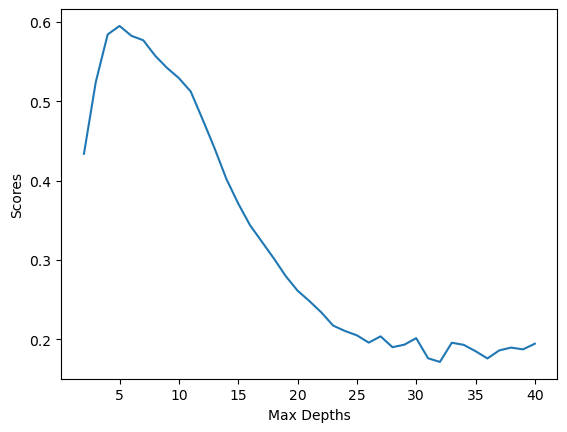

In [76]:
plt.plot(depths, scores['Test Score'])
plt.ylabel('Scores')
plt.xlabel('Max Depths')

In [77]:
sort_scores = scores.sort_values(by = 'Test Score', ascending = False)
sort_scores.head(5)

,Train Score,Test Score
5,0.603933,0.594709
4,0.582625,0.584005
6,0.615153,0.582255
7,0.626842,0.576662
8,0.64384,0.557214


Even though out plot states that 5 and 4 are the best models. I decided to go with 6. This is because 5 and 4 have higher bias which is **underfitting.** I would go on the model with the lowest bias.

In [78]:
dec_tree_best_model = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_best_model_pipe = make_pipeline(preprocessor, dec_tree_best_model)
dec_tree_best_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000152F0839610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='mis...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=42))])

In [79]:
dec_tree_best_model_train = dec_tree_best_model_pipe.predict(X_train)
dec_tree_best_model_test = dec_tree_best_model_pipe.predict(X_test)

performance_metrics(y_train, dec_tree_best_model_train, name = 'Tuned Decision Tree Train')
performance_metrics(y_test, dec_tree_best_model_test, name = 'Tuned Decision Tree Test')

In [80]:
display(metrics_df.tail(2).round(2))

,r2,MAE,MSE,RMSE
Tuned Decision Tree Train,0.62,747.58,1138939.06,1067.21
Tuned Decision Tree Test,0.58,742.57,1152549.33,1073.57


- We have higher r2 than the linear model. MAE and RMSE are lower in this model.

### Bagged Tree Regressor Model

In [81]:
bag_tree = BaggingRegressor(random_state = 42)
bag_tree_pipe = make_pipeline(preprocessor, bag_tree)
bag_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000152F0839610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='mis...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [82]:
bag_tree_train_pred = bag_tree_pipe.predict( X_train)
bag_tree_test_pred = bag_tree_pipe.predict(X_test)

performance_metrics(y_train, bag_tree_train_pred, name = 'Bagged Tree Train')
performance_metrics(y_test, bag_tree_test_pred, name = 'Bagged Tree Test')

In [83]:
display(metrics_df.tail(2).round(2))

,r2,MAE,MSE,RMSE
Bagged Tree Train,0.92,317.77,237580.99,487.42
Bagged Tree Test,0.54,776.51,1280318.14,1131.51


- Bagged Tree Model Shows great difference between our Training and Testing, which indicates that this data is having **overfitting** bias.

### Random Forest Regressor Model

In [84]:
random_forest = RandomForestRegressor(random_state = 42)
random_forest_pipe = make_pipeline(preprocessor, random_forest)
random_forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000152F0839610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='mis...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [85]:
random_forest_train_pred = random_forest_pipe.predict(X_train)
random_forest_test_pred = random_forest_pipe.predict(X_test)

performance_metrics(y_train, random_forest_train_pred, name='Random Forest Train')
performance_metrics(y_test, random_forest_test_pred, name='Random Forest Test')

In [86]:
display(metrics_df.tail(2).round(2))

,r2,MAE,MSE,RMSE
Random Forest Train,0.94,296.26,182539.67,427.25
Random Forest Test,0.56,766.19,1216338.57,1102.88


- **Overfitting** bias is seen on Random Forest Regressor Model as the R^2 in traning is .94 on the other hand the test only have .55.

### K-Nearest Neighbors Model

In [87]:
k_nieghbors = KNeighborsRegressor()
k_nieghbors_pipe = make_pipeline(preprocessor, k_nieghbors)
k_nieghbors_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000152F0839610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='mis...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size',
                                                   'Outlet_Type'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsregressor', KNeighborsRegressor())])

In [88]:
k_nieghbors_train_pred = k_nieghbors_pipe.predict(X_train)
k_nieghbors_test_pred = k_nieghbors_pipe.predict(X_test)

performance_metrics(y_train, k_nieghbors_train_pred, name = 'K-Neighbors Train')
performance_metrics(y_test, k_nieghbors_test_pred, name = 'K-Neighbors Test')

In [89]:
display(metrics_df.tail(2).round(2))

,r2,MAE,MSE,RMSE
K-Neighbors Train,0.66,715.29,994506.49,997.25
K-Neighbors Test,0.49,839.76,1399274.27,1182.91


- This model also have an overfitting. 

## Comparing all Models

In [90]:
display(metrics_df.round(2))

,r2,MAE,MSE,RMSE
Linear Regression Train,0.56,847.22,1297594.56,1139.12
Linear Regression Test,0.57,804.15,1194051.48,1092.73
Decision Tree Train,1.00,0.00,0.00,0.00
Decision Tree Test,0.19,1038.16,2221988.71,1490.63
Tuned Decision Tree Train,0.62,747.58,1138939.06,1067.21
Tuned Decision Tree Test,0.58,742.57,1152549.33,1073.57
Bagged Tree Train,0.92,317.77,237580.99,487.42
Bagged Tree Test,0.54,776.51,1280318.14,1131.51
Random Forest Train,0.94,296.26,182539.67,427.25
Random Forest Test,0.56,766.19,1216338.57,1102.88


### Model Performance:

- Tuned Decision Tree has the lowest Testing MAE at 747.58.
- Tuned Decision Tree has the lowest Testing MSE at 1138939.058.
- Tuned Decision Tree has the lowest Testing RMSE at 1073.569.

Over-all Decision Tree tuned at 6 max depth still have a little bias on it but it out-perform other models. I would Recommend it as it is niether overfitting nor it is underfitting. Another thing to consider is the MAE, MSE and RMSE of this model is the lowest amongst all the models.

